# Active Brownian Particles


In [1]:
### Install dependencies
# Substitute pip3.9 with your version
!pip3.9 install matplotlib numpy pybind11
# Compile the module abp
!make

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
g++ -O3 -Wall -shared -std=c++11 -undefined dynamic_lookup  $(python3.9 -m pybind11 --includes) functions.cpp pybind.cpp -o abp$(python3.9-config --extension-suffix)


In [2]:
### Import modules
import matplotlib.pyplot as plt
import numpy as np
import math
from abp import ABP_2d, point, region
from plot import plot_potential, plot_trajectory, plot_single_particle, plot_transition_density, calculate_reactive_times, plot_reactive_time, plot_transition_rates, plot_transition_density_chiral




In [3]:
### Set fixed parameters
L = 1.0
k=1.0
mu = 1.0
dt = 1e-5
D_r = 1.0
l_dstar = 0.0
v_max = 8*math.pi*k*mu/L

## Stochastic Dynamics

Let us consider an active bwroninan particle moving in a potential given by <br>

$V(x,y) = k\bigl[ \sin\bigl(\frac{8\pi}{L}\bigl(x+\frac{3L}{16}\bigr)\bigr) + \sin\bigl(\frac{8\pi}{L}\bigl(y+\frac{3L}{16}\bigr)\bigr)\bigr]$. <br>

The particle changes velocity direction according to a random walk with velocity (chirality) $w$. The discretized dynamics equations in Ito prescription are: <br>

$x_{n+1} = x_n + v \cos(\theta_n) dt + \mu F_x(x_n,y_n)dt+ \sqrt{2D_rdt}\; \eta_x  $, <br>

$y_{n+1} = y_n + v \sin(\theta_n) dt + \mu F_y(x_n,y_n)dt +\sqrt{2D_rdt} \; \eta_y $, <br>

$ \theta_{n+1} = \theta_n + wdt + \sqrt{2D_{\theta}dt} \; \eta_{\theta}$. <br>

where $\eta_x, \eta_y, \eta_{\theta}$ are independent white gaussian noises. <br>

The effective thermal energy, which defines the temperature of the bath in the passive case, is $k_B T = \frac{D_r}{\mu}\;.$ <br>

The maximum force acting on a coordinate direction (i.e. in the point x=0, y=L/16) is $F_{max} = \frac{8 \pi k}{L}$, which yields the thermal fluctuations length $\tilde{L} = \frac{k_B T}{F_{max}} = \frac{D_r L}{8 \pi \mu k}$ <br>

The Peclet number measures the importance of self propulsion relative to thermal fluctuations and it is defined as $Pe = \frac{v \tilde{L}}{D_r} = \frac{v}{v_{max}}$, where $v_{max}= \frac{D_r F_{max}}{k_B T}= \frac{8 \pi k \mu}{L}$ is the maximum drift velocity (a particle with $Pe>1$ can in principle climb the minimum energy path without thermal fluctuations). <br>

Finally, we define the persistence length as the length scale at which particle trajectories look straight (measuring the importance of velocity with respect fluctuations on the direction) as $l^* = \frac{v}{D_{\theta}L}$. <br>

Therefore, by setting the coefficients $L=k=\mu=D_r=1$, in the case of achiral particles the problem is compeletely determined by the adimensionless numebers: the Peclet number and the persistence length, and we have $v = Pe\; v_{max}$ and $D_{\theta} = \frac{Pe}{l^*} \frac{v_{max}^2}{D_r}$.<br>

We can define another adimensionless parameter,  by measuring the importance of $w$ with respect the velocity (somehow measuring the radius of trajectories, which tend to sistematically circle and mesh due to it). Since $v/w$ has dimensions of a length, we define a second persistence length $l^{**} = \frac{v}{w \tilde{L}} = \frac{v \; v_{max}}{w\; D_r}$, from which $w = \frac{v\; v_{max}}{l^{**}D_r}$.

## Potential plot

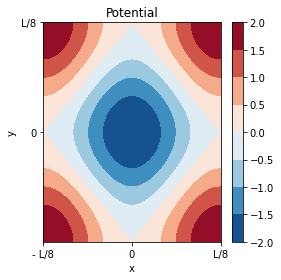

In [4]:
fig = plot_potential()

## Trajectory examples

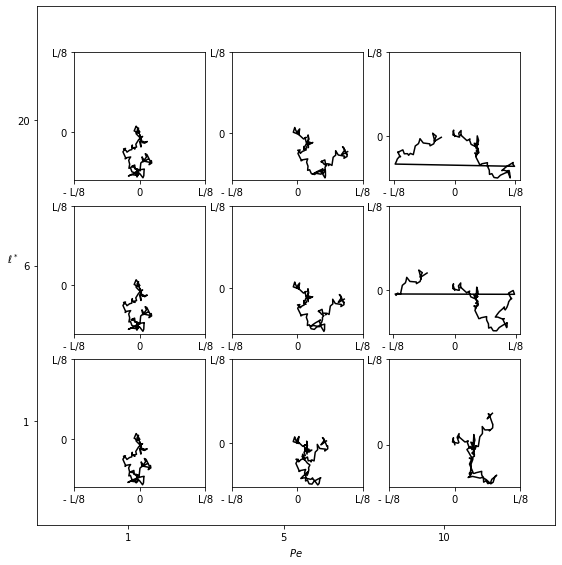

In [5]:
pe_vec = [1,5,10]
lstar_vec = [20,6, 1]

fig = plot_trajectory(pe_vec, lstar_vec, l_dstar=10**10, num_steps=10**2)

## R and T are both minima

In [6]:
# Define reactant and target region
reactant = region(x=0,y=0,radius=L/40.0)
target = region(x=0,y=0,radius=L/40.0)
is_out = True

### Passive Particle

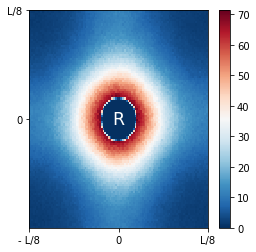

In [7]:
fig = plot_single_particle(reactant, target,is_out=is_out, pe = 0, l_star=1.0, l_dstar=10, num_steps=10**7)

### Active particle

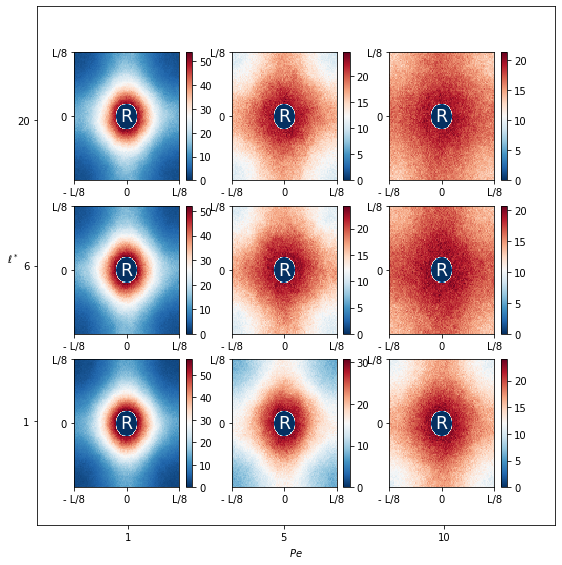

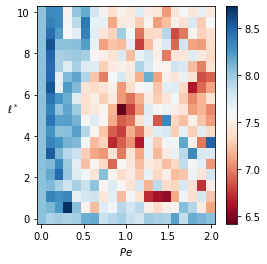

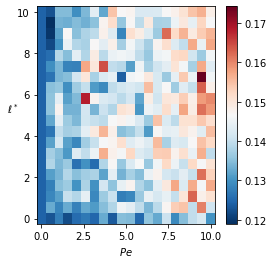

In [8]:
### Transition probability density plot
pe_vec = [1,5,10]
lstar_vec = [20,6, 1]

# Plot transition probability density
fig = plot_transition_density(reactant, target, pe_vec, lstar_vec, is_out=is_out, l_dstar=10**15)

### Average reactive time steps
# Define a grid of peclet and lstar numebers
pe_vec = np.linspace(0,2,20)
lstar_vec = np.linspace(0.01,10,20)

fig = plot_reactive_time(reactant, target, pe_vec, lstar_vec, is_out=is_out, l_dstar=10**15)

### Transition Rates
# Define a grid of peclet and lstar
pe_vec = np.linspace(0,10,20)
lstar_vec = np.linspace(0.01,10,20)

fig = plot_transition_rates(reactant, target, pe_vec, lstar_vec, is_out = is_out, l_dstar=10**15)


## R is a minimum and T a maximum

In [9]:
# Define reactant and target region
reactant = region(x=0,y=0,radius=L/40.0)
target = region(x=L/8,y=L/8,radius=L/40.0)
is_out = False

### Passive particle

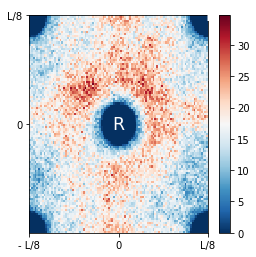

In [10]:
fig = plot_single_particle(reactant, target,is_out=is_out, pe = 0, l_star=10**15, l_dstar=0.01, num_steps=10**7)

### Active particle

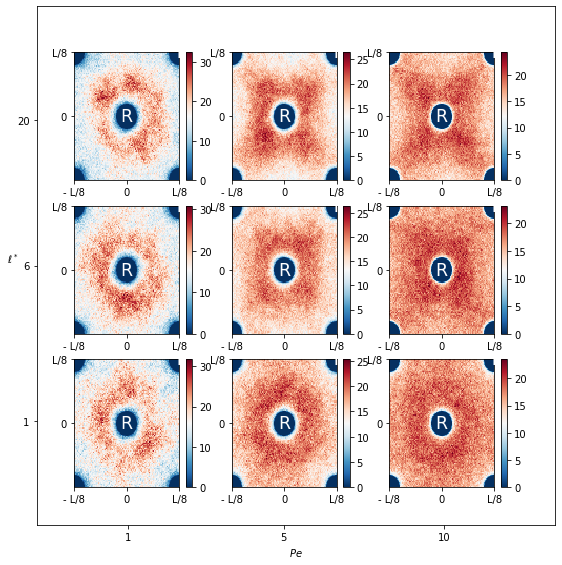

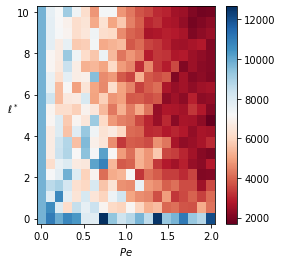

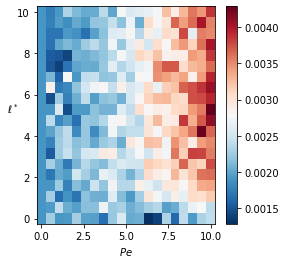

In [11]:
### Transition probability density plot
pe_vec = [1,5,10]
lstar_vec = [20,6, 1]

# Plot transition probability density
fig = plot_transition_density(reactant, target, pe_vec, lstar_vec, is_out=is_out, l_dstar=10**15)

### Average reactive time steps
# Define a grid of peclet and lstar numebers
pe_vec = np.linspace(0,2,20)
lstar_vec = np.linspace(0.01,10,20)

fig = plot_reactive_time(reactant, target, pe_vec, lstar_vec, is_out=is_out, l_dstar=10**15)

### Transition Rates
# Define a grid of peclet and lstar
pe_vec = np.linspace(0,10,20)
lstar_vec = np.linspace(0.01,10,20)

fig = plot_transition_rates(reactant, target, pe_vec, lstar_vec, is_out = is_out,l_dstar=10**15)


## Case 3: R is a minimum and T a maximum force point

In [12]:
# Define reactant and target region
reactant = region(x=0,y=0,radius=L/40.0)
target = region(x=L/16,y=0,radius=L/40.0)
is_out = False

## Passive particle

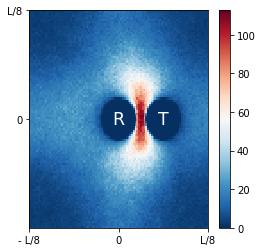

In [13]:
fig = plot_single_particle(reactant, target,is_out=is_out, pe = 0, l_star=10**15, l_dstar=10**15, num_steps=10**7)

## Active particle

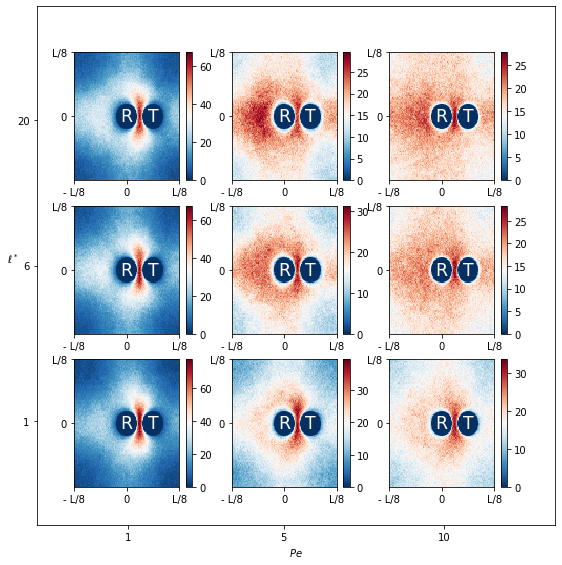

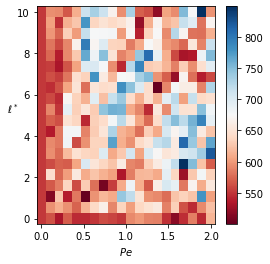

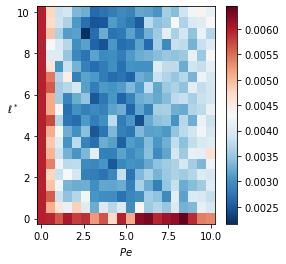

In [17]:
### Transition probability density plot
pe_vec = [1,5,10]
lstar_vec = [20,6, 1]

# Plot transition probability density
fig = plot_transition_density(reactant, target, pe_vec, lstar_vec, is_out=is_out, l_dstar=10**15)

### Average reactive time steps
# Define a grid of peclet and lstar numebers
pe_vec = np.linspace(0,2,20)
lstar_vec = np.linspace(0.01,10,20)

fig = plot_reactive_time(reactant, target, pe_vec, lstar_vec, is_out=is_out,l_dstar=10**15)

### Transition Rates
# Define a grid of peclet and lstar
pe_vec = np.linspace(0,10,20)
lstar_vec = np.linspace(0.01,10,20)

fig = plot_transition_rates(reactant, target, pe_vec, lstar_vec, is_out = is_out, l_dstar=10**15)

## Adding Chirality

### R is a minimum and T a maximum

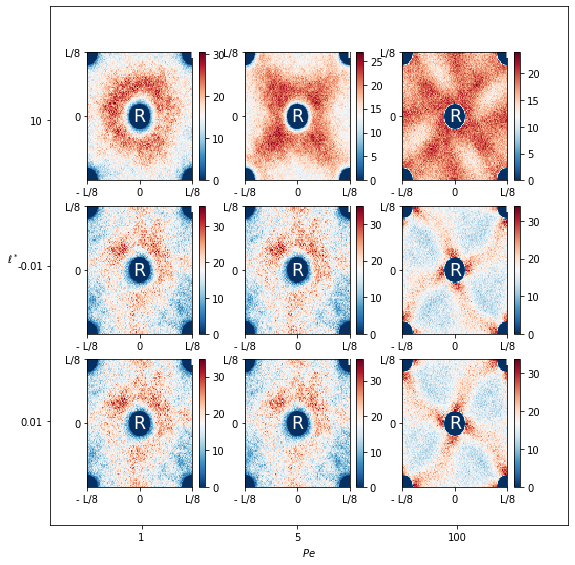

In [15]:
# Define reactant and target region
reactant = region(x=0,y=0,radius=L/40.0)
target = region(x=L/8,y=L/8,radius=L/40.0)
is_out = False

## Transition probability density plot
pe_vec = [1,5,100]
ldstar_vec = [10,-0.01, 0.01]

# Plot transition probability density
fig = plot_transition_density_chiral(reactant, target, pe_vec, ldstar_vec, is_out=False)


### R is a minimum and T a maximum force point

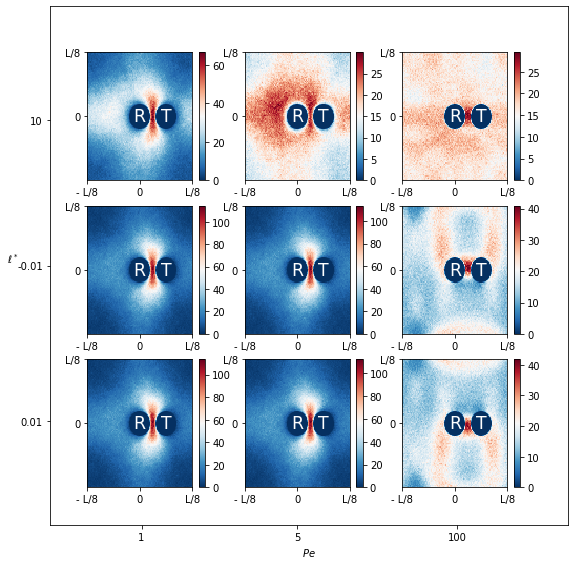

In [16]:
# Define reactant and target region
reactant = region(x=0,y=0,radius=L/40.0)
target = region(x=L/16,y=0,radius=L/40.0)
is_out = False

## Transition probability density plot
pe_vec = [1,5,100]
ldstar_vec = [10,-0.01, 0.01]

# Plot transition probability density
fig = plot_transition_density_chiral(reactant, target, pe_vec, ldstar_vec, is_out=False)